## 1. Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 

## 2. Load Data

In [2]:
# load data 
df = pd.read_csv("../dataset/DatasetWithTagFinal.csv")

In [3]:
# Check 5 top data
df.head()

,sentence,kata,tag
0,Kalimat 1,forza,B-Game
1,Kalimat 1,horizon,E-Game
2,Kalimat 1,om,O
3,Kalimat 1,sekali,O
4,Kalimat 1,install,B-Request


In [4]:
# Check 5 bottom data
df.tail()

,sentence,kata,tag
8931,Kalimat 1390,mau,O
8932,Kalimat 1390,ubah,B-Request
8933,Kalimat 1390,min,O
8934,Kalimat 1391,ready,B-Ketersediaan
8935,Kalimat 1391,gan,O


In [5]:
# Check column detail 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  8936 non-null   object
 1   kata      8936 non-null   object
 2   tag       8936 non-null   object
dtypes: object(3)
memory usage: 209.6+ KB


These are information detail per column: 
- sentence = sentence question from discussion 
- kata = part of kata from sentence 
- tag = tag / label from kata and sentence

In [6]:
# Check missing value
df.isnull().sum()

sentence    0
kata        0
tag         0
dtype: int64

## 3. Visualization

### 3.1 Top 5 word tag in discussion

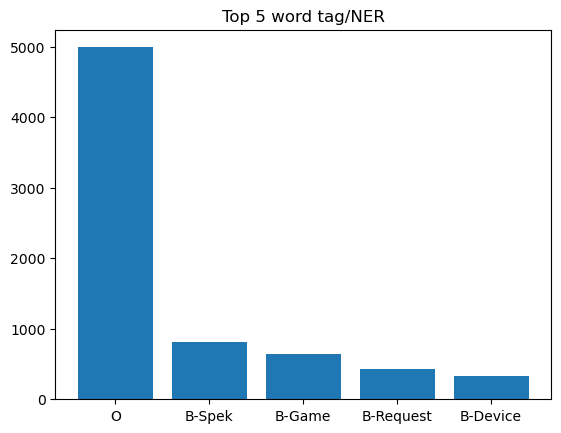

In [7]:
# get data with only tag with first character B and O, and then group it and search size for every tag 
data = pd.DataFrame(df[(df['tag'].str[0] == 'B' ) | (df['tag'].str[0] == 'O')].groupby(['tag']).size().sort_values(ascending=False).iloc[0:5])
x = data.index.to_list()
y = data.values.ravel()

# this is used to create visualiation data using matplotlib
plt.bar(x,y)
plt.title("Top 5 word tag/NER")
plt.show()

From graph above we can know that our dataset from every question has word with no meaning. So it's better to remove it before model training to prevent missleading model evaluation. Beside that we know that most people will ask for product PC Gaming about Spek, Game, Request, and Device. 

### 3.2 Top 5 Specs that people ask about the most

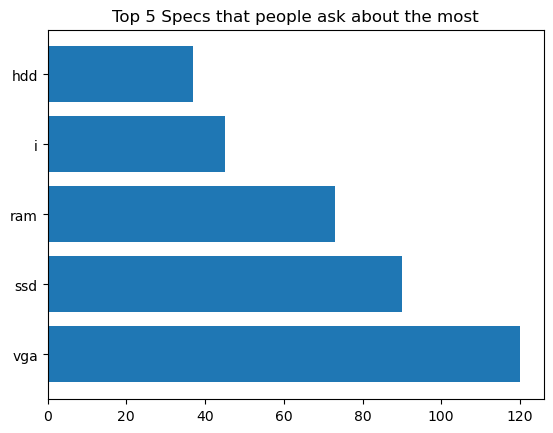

In [8]:
# get data with only tag 'B-Spek' after that grouping it by tag and check size for every kata
data = pd.DataFrame(df[df['tag'] == 'B-Spek'][['kata','tag']].groupby('kata').count().sort_values(by='tag',ascending=False)).iloc[0:5]
labels = data.index.to_list()
y = data.values.ravel()

# this is used to create visualiation data using matplotlib
plt.barh(labels,y)
plt.title("Top 5 Specs that people ask about the most")
plt.show()

In graph above we can know that vga is the most topic that people asked when try to buy pc gaming. It is make sense because vga is the most important part to not only play game, but also for rendering, edit video, etc. 

### 3.3 Top 5 Game that people ask about the most

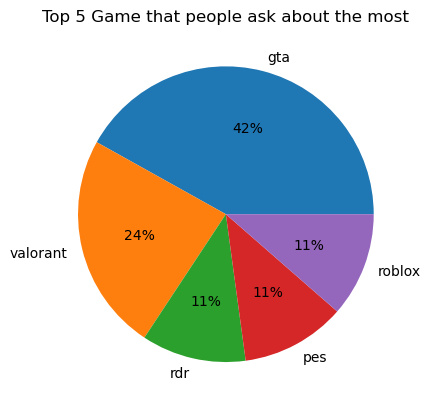

In [9]:
# get data with only tag 'B-Game' after that grouping it by tag and check size for every kata
data = pd.DataFrame(df[df['tag'] == 'B-Game'][['kata','tag']].groupby('kata').count().sort_values(by='tag',ascending=False)).loc[['gta','valorant','rdr','pes','roblox']]

labels = data.index.to_list()
y = data.values.ravel()

# this is used to create visualiation data using matplotlib
plt.pie(y,labels=labels,autopct='%1.0f%%')
plt.title("Top 5 Game that people ask about the most")
plt.show()

From graph above we can know that gta is the most game asked by people who buy pc gaming. It is prove that game gta is used for benchmark for PC Gaming. Because for example in GTA V required spek like : 
- Requires a 64-bit processor and operating system.
- OS: Windows 10 64 Bit.
- Processor: Intel Core i5 3470 @ 3.2GHz (4 CPUs) / AMD X8 FX-8350 @ 4GHz (8 CPUs)
- Memory: 8 GB RAM.
- Graphics: NVIDIA GTX 660 2GB / AMD HD 7870 2GB.
- Storage: 120 GB available space.
- Sound Card: 100% DirectX 10 compatible.

### 3.4 Top 5 Device that people ask about the most

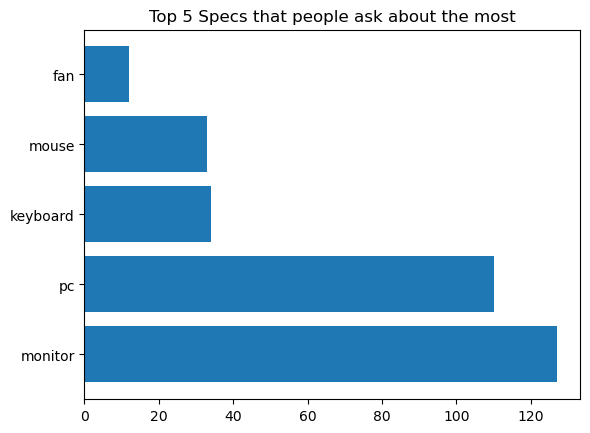

In [10]:
# get data with only tag 'B-Device' after that grouping it by tag and check size for every kata
data = pd.DataFrame(df[df['tag'] == 'B-Device'][['kata','tag']].groupby('kata').count().sort_values(by='tag',ascending=False)).iloc[0:5]

labels = data.index.to_list()
y = data.values.ravel()

# this is used to create visualiation data using matplotlib
plt.barh(labels,y)
plt.title("Top 5 Specs that people ask about the most")
plt.show()

From Graph above we can see that most people will ask about monitor by tag device when try to buy PC . It is proved that people will prefer buy pc gaming that also include with monitor with first priority, following by keyboard and mouse.

### 3.5 Top 5 Activity that people ask about the most

In [11]:
# Steming manual
df.loc[df['kata'] == 'desain','kata'] = 'design'
df.loc[df['kata'] == 'editing','kata'] = 'edit'
df.loc[df['kata'] == 'rander','kata'] = 'render'
df.loc[df['kata'] == 'live','kata'] = 'livestream'

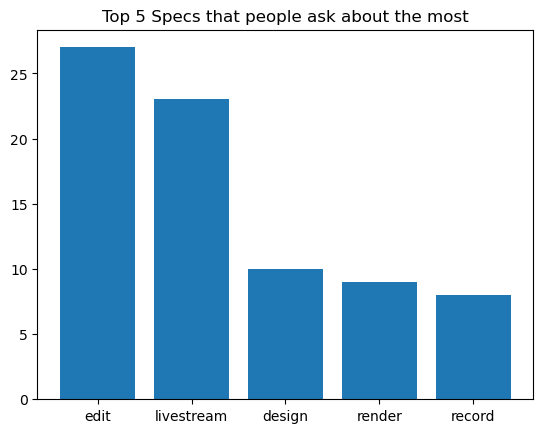

In [12]:
# get data with only tag 'B-Kegiatan' after that grouping it by tag and check size for every kata
data = pd.DataFrame(df[df['tag'] == 'B-Kegiatan'][['kata','tag']].groupby('kata').count().sort_values(by='tag',ascending=False)).iloc[0:5]

labels = data.index.to_list()
y = data.values.ravel()

# this is used to create visualiation data using matplotlib
plt.bar(labels,y)
plt.title("Top 5 Specs that people ask about the most")
plt.show()

From graph above we can know that most people will ask about edit in category activity when try to buy PC. It is proved that people not only buy pc gaming to play high spec game, but also to do something else like editing video.